In [6]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

prefix = "MSFT_2012-06-21_34200000_57600000"
features_data = f"./data/features_{prefix}.csv"
labels_data = f"./data/labels_{prefix}.csv"

def load_data(file):
    df = pd.read_csv(file)
    # df = df.dropna()

    if 'timestamp' in df.columns:
        df = df.drop(columns=['timestamp', 'orderId'])

    return df

feature_df = load_data(features_data)
labels_df = load_data(labels_data)

print(f"Features shape: {feature_df.shape}")
print(f"Labels shape: {labels_df.shape}")
display(feature_df.head())
display(labels_df.head())

Features shape: (595800, 350)
Labels shape: (595800, 3)


,direction,bid_ask_qty_comd,bid_ask_qty_diff,type,orderId,bid_4_size,ask_1_size,midprice,ask_5_size,bid_5_size,...,ask_2_size_rolling_mean_5s,ask_2_size_rolling_max_5s,ask_2_size_rolling_min_5s,ask_2_size_rolling_std_5s,size_rolling_mean_1s,size_rolling_std_1s,size_rolling_mean_3s,size_rolling_std_3s,size_rolling_mean_5s,size_rolling_std_5s
0,-1,0.016639,0.359777,3,16085616,0.004676,0.017498,0.84186,0.00091,0.0,...,0.000000,0.000000,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,-1,0.016639,0.359777,1,16116348,0.004676,0.017498,0.84186,0.00091,0.0,...,0.002815,0.000457,NaN,0.003773,0.0,0.0,0.0,0.0,0.0,0.0
2,-1,0.016639,0.359777,1,16116658,0.004676,0.017498,0.84186,0.00091,0.0,...,0.001877,0.000457,NaN,0.002702,0.0,0.0,0.0,0.0,0.0,0.0
3,-1,0.016639,0.359777,1,16116704,0.004676,0.017498,0.84186,0.00091,0.0,...,0.001408,0.000457,NaN,0.002063,0.0,0.0,0.0,0.0,0.0,0.0
4,-1,0.016639,0.359777,1,16116752,0.004676,0.017498,0.84186,0.00091,0.0,...,0.001126,0.000457,NaN,0.001628,0.0,0.0,0.0,0.0,0.0,0.0


,1s_change,3s_change,5s_change
0,200.0,200.0,350.0
1,200.0,200.0,350.0
2,200.0,200.0,350.0
3,200.0,200.0,350.0
4,200.0,200.0,350.0


In [7]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split
import joblib

X_train, X_test, y_train, y_test = train_test_split(feature_df, labels_df['5s_change'], test_size=0.33)

print("[+] Loading model...")
lgbm : LGBMClassifier = joblib.load('lgbm.joblib')
predictions = lgbm.predict(X_test)

print(f"R^2 Score: {lgbm.score(X_test, y_test)}")

[+] Loading model...
R^2 Score: 0.3952973847233666


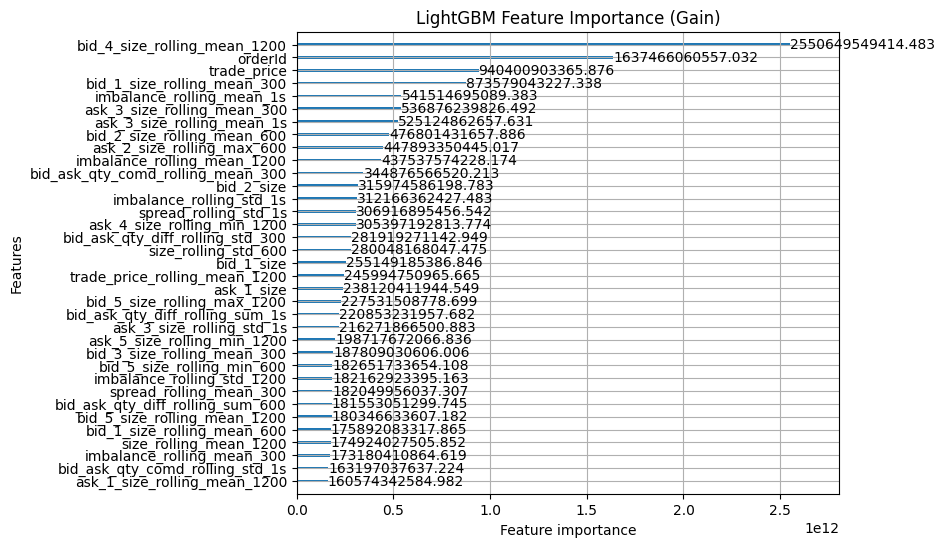

In [8]:
plot_importance(lgbm, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)", max_num_features=35)
plt.show()